# Evolución

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
!wget https://covid19.isciii.es/resources/serie_historica_acumulados.csv
!mv serie_historica_acumulados.csv data/
# !wget https://ourworldindata.org/630a1859-6c13-4efc-ba0e-e8c29dc4a647

--2020-05-03 18:18:13--  https://covid19.isciii.es/resources/serie_historica_acumulados.csv
Resolving covid19.isciii.es (covid19.isciii.es)... 193.146.50.140, 193.146.52.140
Connecting to covid19.isciii.es (covid19.isciii.es)|193.146.50.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46816 (46K) [application/octet-stream]
Saving to: 'serie_historica_acumulados.csv'

serie_historica_acu 100%[===================>]  45.72K  --.-KB/s    in 0.03s   

2020-05-03 18:18:13 (1.42 MB/s) - 'serie_historica_acumulados.csv' saved [46816/46816]



In [3]:
!ls data

02002.csv			 serie_historica_acumulados.csv
2915bsc.csv			 total-covid-deaths-per-million.csv
nacional_covid19_rango_edad.csv


In [4]:
df = pd.read_csv(
#     URL,
    os.path.join('data', 'serie_historica_acumulados.csv'), 
                      engine='python',
                      skipfooter=6)
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.fecha = pd.to_datetime(df.fecha, format='%d/%m/%Y')
df.sort_values('fecha', inplace=True)
df

ccaa      fecha  casos     pcr+  testac+  hospitalizados     uci  \
0      AN 2020-02-20    NaN      NaN      NaN             NaN     NaN   
18     RI 2020-02-20    NaN      NaN      NaN             NaN     NaN   
17     PV 2020-02-20    NaN      NaN      NaN             NaN     NaN   
16     NC 2020-02-20    NaN      NaN      NaN             NaN     NaN   
15     MC 2020-02-20    NaN      NaN      NaN             NaN     NaN   
...   ...        ...    ...      ...      ...             ...     ...   
1369   AR 2020-05-02    NaN   5164.0   1044.0          2519.0   260.0   
1368   AN 2020-05-02    NaN  12175.0   2112.0          5961.0   736.0   
1385   PV 2020-05-02    NaN  12938.0   3259.0          6692.0   553.0   
1376   CT 2020-05-02    NaN  50234.0   1027.0         27257.0  2844.0   
1386   RI 2020-05-02    NaN   3952.0   1295.0          1446.0    88.0   

      fallecidos  recuperados  
0            NaN          NaN  
18           NaN          NaN  
17           NaN          NaN  
16           NaN          NaN  
15           NaN          NaN  
...          ...          ...  
1369       761.0       2558.0  
1368      1256.0       6897.0  
1385      1329.0      12024.0  
1376      5185.0      20332.0  
1386       335.0       2297.0  

[1387 rows x 9 columns]

In [5]:
df.fecha.max()

Timestamp('2020-05-02 00:00:00')

In [6]:
valid_dates = df.groupby('fecha').ccaa.nunique().eq(19)
valid_dates

fecha
2020-02-20    True
2020-02-21    True
2020-02-22    True
2020-02-23    True
2020-02-24    True
              ... 
2020-04-28    True
2020-04-29    True
2020-04-30    True
2020-05-01    True
2020-05-02    True
Name: ccaa, Length: 73, dtype: bool

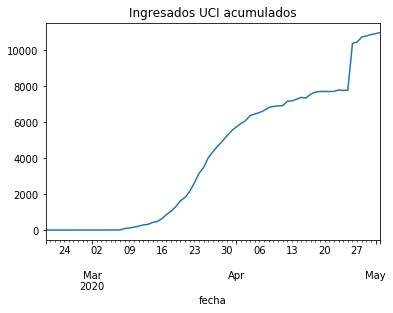

In [7]:
groupby_uci_df = df.groupby('fecha').uci.sum()
groupby_uci_df = groupby_uci_df[valid_dates]
groupby_uci_df.plot(title='Ingresados UCI acumulados');

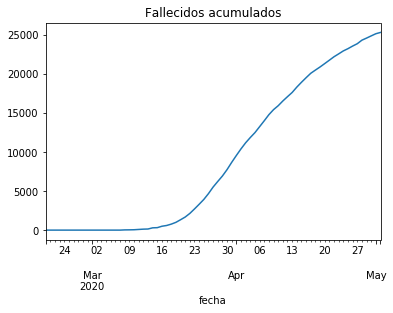

In [8]:
groupby_fallecidos_df = df.groupby('fecha').fallecidos.sum()
groupby_fallecidos_df = groupby_fallecidos_df[valid_dates]
groupby_fallecidos_df.plot(title='Fallecidos acumulados');

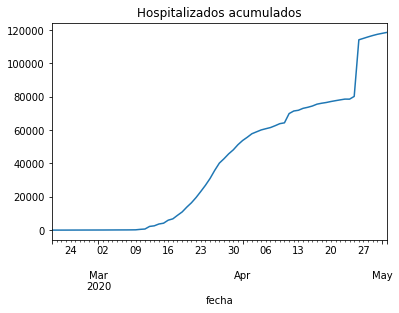

In [9]:
groupby_ingresados_df = df.groupby('fecha').hospitalizados.sum()
groupby_ingresados_df = groupby_ingresados_df[valid_dates]
groupby_ingresados_df.plot(title='Hospitalizados acumulados');

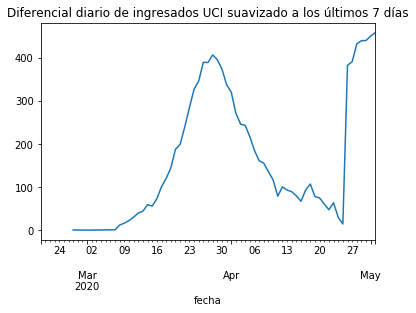

In [10]:
smoothed_differential_uci_incoming = groupby_uci_df.diff().rolling(7).mean()
(smoothed_differential_uci_incoming
.plot(title='Diferencial diario de ingresados UCI suavizado a los últimos 7 días'));

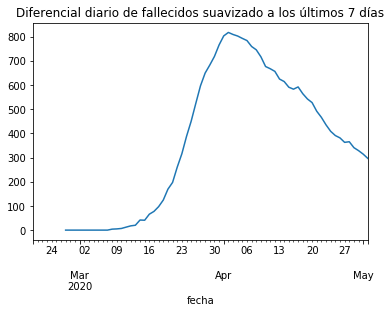

In [11]:
smoothed_differential_fallecidos_incoming = groupby_fallecidos_df.diff().rolling(7).mean()
(smoothed_differential_fallecidos_incoming
.plot(title='Diferencial diario de fallecidos suavizado a los últimos 7 días'));

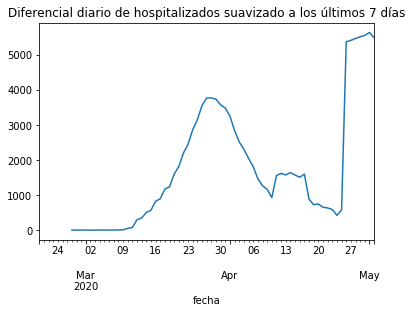

In [12]:
smoothed_differential_hospitalizados_incoming = groupby_ingresados_df.diff().rolling(7).mean()

(smoothed_differential_hospitalizados_incoming
.plot(title='Diferencial diario de hospitalizados suavizado a los últimos 7 días'));

In [13]:
smoothed_differential_fallecidos_incoming.idxmax()

Timestamp('2020-04-02 00:00:00')

In [14]:
smoothed_differential_hospitalizados_incoming.idxmax()

Timestamp('2020-05-01 00:00:00')

In [15]:
smoothed_differential_fallecidos_incoming.idxmax()

Timestamp('2020-04-02 00:00:00')

# Población

In [16]:
groupby_fallecidos_df.tail(1)

fecha
2020-05-02    25264.0
Name: fallecidos, dtype: float64

In [17]:
!ls data/

02002.csv			 serie_historica_acumulados.csv
2915bsc.csv			 total-covid-deaths-per-million.csv
nacional_covid19_rango_edad.csv


In [18]:
import unidecode

unaccent = lambda accented_string: unidecode.unidecode(accented_string)

pob_df = pd.read_csv(os.path.join('data', '2915bsc.csv'), 
                     sep=';', 
                     thousands='.',
                     encoding='latin-1')
pob_df.columns = pob_df.columns.str.lower().str.replace(' ', '_').map(unaccent)
pob_df.rename(columns={'comunidades_y_ciudades_autonomas': 'ccaa_raw',
                       'total': 'poblacion'}, inplace=True)
total_spain_pob = pob_df.iloc[0].poblacion
pob_df = pob_df.iloc[1:]
total_spain_pob

47026208

In [19]:
df.ccaa.nunique()

19

In [20]:
df.ccaa.unique()

array(['AN', 'RI', 'PV', 'NC', 'MC', 'ML', 'GA', 'EX', 'VC', 'MD', 'CT',
       'CE', 'AS', 'IB', 'CN', 'AR', 'CM', 'CL', 'CB'], dtype=object)

In [21]:
ccaa_list = ['AN', 'AR', 'AS', 'IB', 'CN', 'CB',
                  'CL', 'CM', 'CT', 'VC', 'EX',
                  'GA', 'MD', 'MC', 'NC', 'PV', 'RI',
                  'CE', 'ML']
pob_df.insert(1, 'ccaa', ccaa_list)

In [22]:
ccaa_set = set(ccaa_list)
ccaa_set.symmetric_difference(set(df.ccaa.unique())
                         )

set()

In [23]:
pob_df

ccaa_raw ccaa tamano_de_los_municipios  periodo  \
1                     01 Andalucía   AN                    Total     2019   
2                        02 Aragón   AR                    Total     2019   
3       03 Asturias, Principado de   AS                    Total     2019   
4                04 Balears, Illes   IB                    Total     2019   
5                      05 Canarias   CN                    Total     2019   
6                     06 Cantabria   CB                    Total     2019   
7               07 Castilla y León   CL                    Total     2019   
8          08 Castilla - La Mancha   CM                    Total     2019   
9                      09 Cataluña   CT                    Total     2019   
10         10 Comunitat Valenciana   VC                    Total     2019   
11                  11 Extremadura   EX                    Total     2019   
12                      12 Galicia   GA                    Total     2019   
13         13 Madrid, Comunidad de   MD                    Total     2019   
14            14 Murcia, Región de   MC                    Total     2019   
15  15 Navarra, Comunidad Foral de   NC                    Total     2019   
16                   16 País Vasco   PV                    Total     2019   
17                    17 Rioja, La   RI                    Total     2019   
18                        18 Ceuta   CE                    Total     2019   
19                      19 Melilla   ML                    Total     2019   

    poblacion  
1     8414240  
2     1319291  
3     1022800  
4     1149460  
5     2153389  
6      581078  
7     2399548  
8     2032863  
9     7675217  
10    5003769  
11    1067710  
12    2699499  
13    6663394  
14    1493898  
15     654214  
16    2207776  
17     316798  
18      84777  
19      86487

In [24]:
pob_df.ccaa.nunique()

19

In [25]:
df = pd.merge(df, pob_df[['ccaa', 'poblacion']], on='ccaa', how='left')

In [26]:
df['fallecidos_por_millon'] = df.fallecidos.div(df.poblacion.div(1e6))

In [27]:
df.head()

ccaa      fecha  casos  pcr+  testac+  hospitalizados  uci  fallecidos  \
0   AN 2020-02-20    NaN   NaN      NaN             NaN  NaN         NaN   
1   RI 2020-02-20    NaN   NaN      NaN             NaN  NaN         NaN   
2   PV 2020-02-20    NaN   NaN      NaN             NaN  NaN         NaN   
3   NC 2020-02-20    NaN   NaN      NaN             NaN  NaN         NaN   
4   MC 2020-02-20    NaN   NaN      NaN             NaN  NaN         NaN   

   recuperados  poblacion  fallecidos_por_millon  
0          NaN    8414240                    NaN  
1          NaN     316798                    NaN  
2          NaN    2207776                    NaN  
3          NaN     654214                    NaN  
4          NaN    1493898                    NaN

In [28]:
last_date = df.loc[df.fecha.eq(df.fecha.max())].copy()

In [29]:
last_date['meseta_española'] = last_date.ccaa.isin(['MD', 'CM', 'CL'])

In [30]:
media_fallecidos_por_millon_esp = last_date.fallecidos.sum() / total_spain_pob * 1e6
media_fallecidos_por_millon_esp

537.2323449936682

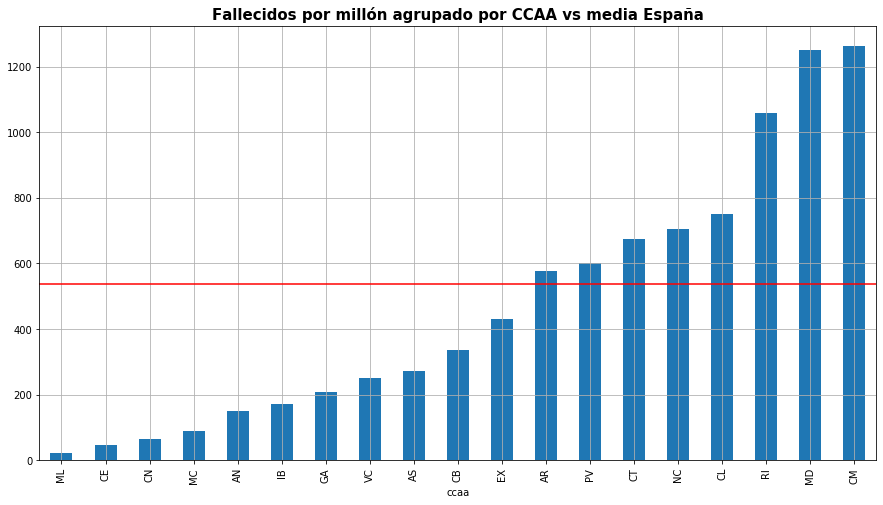

In [31]:
%matplotlib inline
last_date.set_index('ccaa').fallecidos_por_millon.sort_values().plot.bar(figsize=(15, 
                                                                                  8));
plt.axhline(media_fallecidos_por_millon_esp, c='r');
plt.title('Fallecidos por millón agrupado por CCAA vs media España', fontsize=15, fontweight='bold');
plt.grid()

In [32]:
last_date.groupby('meseta_española').fallecidos_por_millon.describe()

count         mean         std         min          25%  \
meseta_española                                                            
False             16.0   354.062389  295.497430   23.124863   134.377626   
True               3.0  1087.440792  292.165103  750.141277  1000.277552   

                         50%          75%          max  
meseta_española                                         
False             263.183947   583.109543  1057.456171  
True             1250.413828  1256.090550  1261.767271

In [33]:
last_date.groupby('meseta_española').fallecidos_por_millon.plot.kde();

In [34]:
last_date.fallecidos_por_millon.mean()

469.85897896408517

In [35]:
last_date.sort_values('fallecidos_por_millon', ascending=False)

ccaa      fecha  casos     pcr+  testac+  hospitalizados     uci  \
1378   CM 2020-05-02    NaN  16017.0   5273.0          8676.0   604.0   
1374   MD 2020-05-02    NaN  62205.0   4609.0         40597.0  3421.0   
1386   RI 2020-05-02    NaN   3952.0   1295.0          1446.0    88.0   
1377   CL 2020-05-02    NaN  17283.0   3946.0          8085.0   533.0   
1370   NC 2020-05-02    NaN   4902.0   1525.0          1986.0   133.0   
1385   CT 2020-05-02    NaN  50234.0   1027.0         27257.0  2844.0   
1384   PV 2020-05-02    NaN  12938.0   3259.0          6692.0   553.0   
1382   AR 2020-05-02    NaN   5164.0   1044.0          2519.0   260.0   
1368   EX 2020-05-02    NaN   2844.0    868.0          1603.0   108.0   
1379   CB 2020-05-02    NaN   2205.0    384.0          1010.0    79.0   
1381   AS 2020-05-02    NaN   2305.0    579.0          1995.0   142.0   
1373   VC 2020-05-02    NaN  10436.0   2250.0          5181.0   698.0   
1369   GA 2020-05-02    NaN   8967.0    858.0          2774.0   315.0   
1380   IB 2020-05-02    NaN   1908.0     82.0          1099.0   167.0   
1383   AN 2020-05-02    NaN  12175.0   2112.0          5961.0   736.0   
1372   MC 2020-05-02    NaN   1492.0    482.0           641.0   110.0   
1376   CN 2020-05-02    NaN   2221.0      0.0           919.0   176.0   
1375   CE 2020-05-02    NaN    101.0     51.0            10.0     4.0   
1371   ML 2020-05-02    NaN    117.0     12.0            44.0     3.0   

      fallecidos  recuperados  poblacion  fallecidos_por_millon  \
1378      2565.0       5772.0    2032863            1261.767271   
1374      8332.0      37704.0    6663394            1250.413828   
1386       335.0       2297.0     316798            1057.456171   
1377      1800.0       6856.0    2399548             750.141277   
1370       462.0       2411.0     654214             706.190941   
1385      5185.0      20332.0    7675217             675.550932   
1384      1329.0      12024.0    2207776             601.963243   
1382       761.0       2558.0    1319291             576.824976   
1368       460.0       2072.0    1067710             430.828596   
1379       195.0       1616.0     581078             335.583175   
1381       280.0        908.0    1022800             273.758311   
1373      1264.0       7447.0    5003769             252.609583   
1369       563.0       6075.0    2699499             208.557217   
1380       197.0       1284.0    1149460             171.384824   
1383      1256.0       6897.0    8414240             149.270760   
1372       134.0       1260.0    1493898              89.698226   
1376       140.0       1150.0    2153389              65.013799   
1375         4.0        141.0      84777              47.182608   
1371         2.0         98.0      86487              23.124863   

      meseta_española  
1378             True  
1374             True  
1386            False  
1377             True  
1370            False  
1385            False  
1384            False  
1382            False  
1368            False  
1379            False  
1381            False  
1373            False  
1369            False  
1380            False  
1383            False  
1372            False  
1376            False  
1375            False  
1371            False

In [36]:
last_date.loc[~last_date.ccaa.isin(['MD', 'CM', 'CL']), 'fallecidos_por_millon'].mean()

354.06238902982

# Total by country

In [37]:
!ls data/

02002.csv			 serie_historica_acumulados.csv
2915bsc.csv			 total-covid-deaths-per-million.csv
nacional_covid19_rango_edad.csv


In [38]:
count_df = pd.read_csv(os.path.join('data', 'total-covid-deaths-per-million.csv'), 
                       parse_dates=['Date'])
count_df.columns = count_df.columns.str.lower().str.replace(' ', '_').map(unaccent)
count_df.rename(columns={'total_confirmed_deaths_due_to_covid-19_per_million_people_(deaths_per_million)':
                         'fallecidos_por_millon'}, inplace=True)
count_df

entity code       date  fallecidos_por_millon
0      Afghanistan  AFG 2019-12-31               0.000000
1      Afghanistan  AFG 2020-01-01               0.000000
2      Afghanistan  AFG 2020-01-02               0.000000
3      Afghanistan  AFG 2020-01-03               0.000000
4      Afghanistan  AFG 2020-01-04               0.000000
...            ...  ...        ...                    ...
13052     Zimbabwe  ZWE 2020-04-18               0.201844
13053     Zimbabwe  ZWE 2020-04-19               0.201844
13054     Zimbabwe  ZWE 2020-04-20               0.201844
13055     Zimbabwe  ZWE 2020-04-21               0.201844
13056     Zimbabwe  ZWE 2020-04-22               0.201844

[13057 rows x 4 columns]

In [39]:
count_df.date.max()

Timestamp('2020-04-22 00:00:00')

In [40]:
count_last_date = count_df.loc[count_df.date.eq(count_df.date.max())]
count_last_date

entity      code       date  fallecidos_por_millon
103    Afghanistan       AFG 2020-04-22               0.924776
217         Africa       NaN 2020-04-22               0.886918
262        Albania       ALB 2020-04-22               9.034679
371        Algeria       DZA 2020-04-22               8.939354
411        Andorra       AND 2020-04-22             478.871417
...            ...       ...        ...                    ...
12861      Vietnam       VNM 2020-04-22               0.000000
12975        World  OWID_WRL 2020-04-22              22.679995
12988        Yemen       YEM 2020-04-22               0.000000
13023       Zambia       ZMB 2020-04-22               0.163186
13056     Zimbabwe       ZWE 2020-04-22               0.201844

[210 rows x 4 columns]

In [41]:
count_last_date.sort_values('fallecidos_por_millon', ascending=False).head(30)

entity code       date  fallecidos_por_millon
10310                 San Marino  SMR 2020-04-22            1178.619836
1580                     Belgium  BEL 2020-04-22             517.532246
411                      Andorra  AND 2020-04-22             478.871417
11199                      Spain  ESP 2020-04-22             455.183377
6245                       Italy  ITA 2020-04-22             407.662170
4427                      France  FRA 2020-04-22             318.597841
12453             United Kingdom  GBR 2020-04-22             255.384011
10663  Sint Maarten (Dutch part)  SXM 2020-04-22             233.198078
8389                 Netherlands  NLD 2020-04-22             228.539774
11531                     Sweden  SWE 2020-04-22             174.765107
5987                     Ireland  IRL 2020-04-22             147.839238
4116                      Europe  NaN 2020-04-22             143.659473
11645                Switzerland  CHE 2020-04-22             137.036666
12567              United States  USA 2020-04-22             136.140905
8812               North America  NaN 2020-04-22             131.133046
7211                  Luxembourg  LUX 2020-04-22             124.605416
4837                   Gibraltar  GIB 2020-04-22             118.726069
6020                 Isle of Man  IMN 2020-04-22             117.602785
1681                     Bermuda  BMU 2020-04-22              80.291619
7923                      Monaco  MCO 2020-04-22              76.444807
9699                    Portugal  PRT 2020-04-22              74.730008
3357                     Denmark  DNK 2020-04-22              63.878977
5763                        Iran  IRN 2020-04-22              63.064814
4763                     Germany  DEU 2020-04-22              58.233114
1029                     Austria  AUT 2020-04-22              51.407888
2397                      Canada  CAN 2020-04-22              48.592877
10757                   Slovenia  SVN 2020-04-22              37.038248
8835    Northern Mariana Islands  MNP 2020-04-22              34.748163
1987      British Virgin Islands  VGB 2020-04-22              33.072064
9369                      Panama  PAN 2020-04-22              32.678466

# Linear model

In [42]:
ESTADO_DE_ALARMA_FECHA = '2020-03-14'

BASE_DATE = '2020-04-01'

base_date_df =  df.loc[df.fecha.eq(BASE_DATE)].copy()
base_date_df = base_date_df.loc[base_date_df.fallecidos.ge(50)]
base_date_df.rename(columns={'fallecidos_por_millon': 'fallecidos_por_millon_base'}, inplace=True)
base_date_df

ccaa      fecha    casos     pcr+  testac+  hospitalizados     uci  \
779   EX 2020-04-01   1837.0      NaN      NaN           412.0    62.0   
780   RI 2020-04-01   2083.0      NaN      NaN           660.0    57.0   
781   PV 2020-04-01   7317.0      NaN      NaN          4087.0   344.0   
782   NC 2020-04-01   2682.0      NaN      NaN          1181.0   108.0   
785   MD 2020-04-01      NaN  40842.0      NaN         15227.0  1528.0   
786   GA 2020-04-01   4842.0      NaN      NaN          1447.0   165.0   
787   VC 2020-04-01   6308.0      NaN      NaN          3389.0   449.0   
789   CT 2020-04-01  21804.0      NaN      NaN         12398.0  1415.0   
790   AR 2020-04-01   2700.0      NaN      NaN          1320.0   178.0   
791   AS 2020-04-01   1384.0      NaN      NaN           640.0    79.0   
792   IB 2020-04-01   1204.0      NaN      NaN           517.0   105.0   
793   AN 2020-04-01      NaN   6957.0      NaN          3444.0   280.0   
794   CB 2020-04-01   1268.0      NaN      NaN           567.0    57.0   
795   CM 2020-04-01   7682.0      NaN      NaN          3230.0   355.0   
796   CL 2020-04-01   7355.0      NaN      NaN          4207.0   353.0   
797   CN 2020-04-01   1444.0      NaN      NaN           566.0   113.0   

     fallecidos  recuperados  poblacion  fallecidos_por_millon_base  
779       181.0        139.0    1067710                  169.521687  
780       101.0        641.0     316798                  318.815144  
781       412.0       2490.0    2207776                  186.613135  
782       141.0        278.0     654214                  215.525807  
785      4175.0      12400.0    6663394                  626.557577  
786       120.0        333.0    2699499                   44.452693  
787       443.0        432.0    5003769                   88.533264  
789      1629.0       3683.0    7675217                  212.241556  
790       200.0        320.0    1319291                  151.596577  
791        69.0        135.0    1022800                   67.461869  
792        58.0        239.0    1149460                   50.458476  
793       343.0        228.0    8414240                   40.764228  
794        60.0         60.0     581078                  103.256361  
795       854.0        494.0    2032863                  420.097173  
796       641.0       1498.0    2399548                  267.133644  
797        68.0         94.0    2153389                   31.578131

In [43]:
last_date_model_df = last_date.loc[last_date.ccaa.isin(base_date_df.ccaa.unique())].copy()
last_date_model_df

ccaa      fecha  casos     pcr+  testac+  hospitalizados     uci  \
1368   EX 2020-05-02    NaN   2844.0    868.0          1603.0   108.0   
1369   GA 2020-05-02    NaN   8967.0    858.0          2774.0   315.0   
1370   NC 2020-05-02    NaN   4902.0   1525.0          1986.0   133.0   
1373   VC 2020-05-02    NaN  10436.0   2250.0          5181.0   698.0   
1374   MD 2020-05-02    NaN  62205.0   4609.0         40597.0  3421.0   
1376   CN 2020-05-02    NaN   2221.0      0.0           919.0   176.0   
1377   CL 2020-05-02    NaN  17283.0   3946.0          8085.0   533.0   
1378   CM 2020-05-02    NaN  16017.0   5273.0          8676.0   604.0   
1379   CB 2020-05-02    NaN   2205.0    384.0          1010.0    79.0   
1380   IB 2020-05-02    NaN   1908.0     82.0          1099.0   167.0   
1381   AS 2020-05-02    NaN   2305.0    579.0          1995.0   142.0   
1382   AR 2020-05-02    NaN   5164.0   1044.0          2519.0   260.0   
1383   AN 2020-05-02    NaN  12175.0   2112.0          5961.0   736.0   
1384   PV 2020-05-02    NaN  12938.0   3259.0          6692.0   553.0   
1385   CT 2020-05-02    NaN  50234.0   1027.0         27257.0  2844.0   
1386   RI 2020-05-02    NaN   3952.0   1295.0          1446.0    88.0   

      fallecidos  recuperados  poblacion  fallecidos_por_millon  \
1368       460.0       2072.0    1067710             430.828596   
1369       563.0       6075.0    2699499             208.557217   
1370       462.0       2411.0     654214             706.190941   
1373      1264.0       7447.0    5003769             252.609583   
1374      8332.0      37704.0    6663394            1250.413828   
1376       140.0       1150.0    2153389              65.013799   
1377      1800.0       6856.0    2399548             750.141277   
1378      2565.0       5772.0    2032863            1261.767271   
1379       195.0       1616.0     581078             335.583175   
1380       197.0       1284.0    1149460             171.384824   
1381       280.0        908.0    1022800             273.758311   
1382       761.0       2558.0    1319291             576.824976   
1383      1256.0       6897.0    8414240             149.270760   
1384      1329.0      12024.0    2207776             601.963243   
1385      5185.0      20332.0    7675217             675.550932   
1386       335.0       2297.0     316798            1057.456171   

      meseta_española  
1368            False  
1369            False  
1370            False  
1373            False  
1374             True  
1376            False  
1377             True  
1378             True  
1379            False  
1380            False  
1381            False  
1382            False  
1383            False  
1384            False  
1385            False  
1386            False

In [44]:
last_date_model_df = \
pd.merge(last_date_model_df,
         base_date_df[['ccaa', 'fallecidos_por_millon_base']],
         on='ccaa',
         how='right')
last_date_model_df['evolution_multiplier'] = last_date_model_df.fallecidos_por_millon.div(
last_date_model_df.fallecidos_por_millon_base)
last_date_model_df.set_index('ccaa', inplace=True)

In [45]:
last_date_model_df.evolution_multiplier.sort_values(ascending=False)

ccaa
GA    4.691667
AS    4.057971
AR    3.805000
AN    3.661808
IB    3.396552
RI    3.316832
NC    3.276596
CB    3.250000
PV    3.225728
CT    3.182934
CM    3.003513
VC    2.853273
CL    2.808112
EX    2.541436
CN    2.058824
MD    1.995689
Name: evolution_multiplier, dtype: float64